In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv("/TCS.csv")

# data preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data)-seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

sequence_length = 10
sequences, labels = create_sequences(scaled_data, sequence_length)
split = int(0.8 * len(sequences))
train_sequences = sequences[:split]
train_labels = labels[:split]
test_sequences = sequences[split:]
test_labels = labels[split:]

# model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences, train_labels, epochs=10, batch_size=32)

# make predictions
predictions = model.predict(test_sequences)

# Evaluate and transform predictions to get actual values
predictions = scaler.inverse_transform(predictions)

# Forecast future values

# Use the last part of the data to forecast the future values
future_sequence = scaled_data[-sequence_length:].reshape(1, sequence_length, 1)
future_prediction = model.predict(future_sequence)

# Inverse transform the forecasted values
future_prediction = scaler.inverse_transform(future_prediction)

print("Predicted Future Value : ", future_prediction)


Epoch 1/10
104/104 [==============================] - 4s 11ms/step - loss: 0.0081
Epoch 2/10
104/104 [==============================] - 1s 10ms/step - loss: 4.0888e-04
Epoch 3/10
104/104 [==============================] - 1s 8ms/step - loss: 4.0785e-04
Epoch 4/10
104/104 [==============================] - 1s 8ms/step - loss: 4.0382e-04
Epoch 5/10
104/104 [==============================] - 1s 8ms/step - loss: 4.0238e-04
Epoch 6/10
104/104 [==============================] - 1s 8ms/step - loss: 3.9494e-04
Epoch 7/10
104/104 [==============================] - 1s 8ms/step - loss: 3.9111e-04
Epoch 8/10
104/104 [==============================] - 1s 8ms/step - loss: 3.7169e-04
Epoch 9/10
104/104 [==============================] - 1s 8ms/step - loss: 3.6583e-04
Epoch 10/10
1/1 [==============================] - 0s 15ms/step
Predicted Future Value :  [[3112.4763]]


Mean Squared Error: 60363411586471.38
Mean Absolute Error: 7630904.506234867


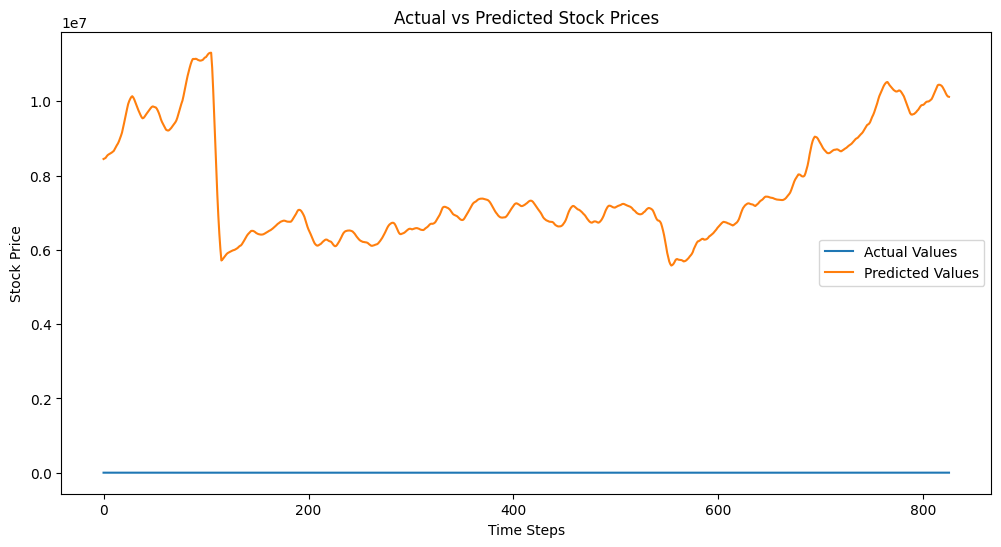

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Transform test labels back to original scale
test_labels_original = scaler.inverse_transform(test_labels.reshape(-1, 1))

# Transform predictions back to original scale
predictions_original = scaler.inverse_transform(predictions)

# Calculate Mean Squared Error
mse = mean_squared_error(test_labels_original, predictions_original)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(test_labels_original, predictions_original)
print("Mean Absolute Error:", mae)

# Visualize predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_labels_original, label='Actual Values')
plt.plot(predictions_original, label='Predicted Values')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense


In [ ]:
data=pd.read_csv("/content/TCS.csv")

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data['Close'].values.reshape(-1,1))

In [ ]:
def create_sequence(data,seq_length):
  sequences=[]
  labels=[]
  for i in range(len(data)-seq_length):
    sequences.append(data[i:i+seq_length])
    labels.append(data[i+seq_length])
  return np.array(sequences),np.array(labels)

In [ ]:
sequence_length=10
sequences,labels=create_sequence(scaled_data,sequence_length)

In [ ]:
split=int(0.8*(len(sequences)))
train_sequences=sequences[:split]
train_labels=labels[:split]
test_sequences=sequences[split:]
test_labels=labels[split:]

